## サポートベクターマシン回帰

In [2]:
%matplotlib inline
%precision 3
import pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
# ボストン市の住宅価格データ
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X = X[['RM', 'LSTAT']]
# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = (
    train_test_split(X, boston.target, random_state=0))

In [3]:
# SVRで確認
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
score1 = r2_score(y_test, y_pred)
float(score1)

0.506

In [4]:
def scatter(y_pred, y):
    plt.gca().set_aspect('equal', adjustable='box') # 縦横比を1
    plt.ylabel('y_test')
    plt.xlabel('y_pred')
    plt.plot([y.min(), y.max()], [y.min(), y.max()]) # 斜め４５度の青い線
    plt.plot(y_pred, y, '.')

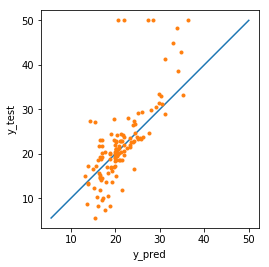

In [5]:
# 予測データ(y_pred)と真値(y_test)を描画
scatter(y_pred, y_test)

In [6]:
# グリッドサーチで探索
# グリッドサーチは与えられたオプションの組み合わせを全て探索する。
# 各探索の中でクロスバリデーションを行う
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(SVR(), {
    'C': [50, 60, 70, 80, 90],
    'gamma': [0.04, 0.05, 0.06, 0.07, 0.08]},
                   scoring='r2')
gscv.fit(X_train, y_train)
y_pred = gscv.predict(X_test)
score2 = r2_score(y_test, y_pred)
float(score2)

0.648

In [7]:
# 選択されたパラメーター
gscv.best_params_

{'C': 70, 'gamma': 0.060}

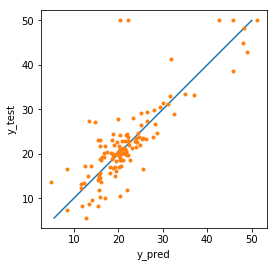

In [8]:
# 予測データ(y_pred)と真値(y_test)を描画
scatter(y_pred, y_test)

## ランダムフォレスト回帰
- 複数の決定木を使うアンサンブル学習
- 外れ値の影響を受けにくい
- デメリットは予測値がカテゴリ化しやすい

In [9]:
# RandomForestRegressorで確認
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
score3 = r2_score(y_test, y_pred)
float(score3)

0.667

In [10]:
# グリッドサーチで探索
# max_depth: 枝分かれする木の深さ。大きすぎると過学習になる
# min_samples_leaf: 葉の最小のデータ数。大きくするとラフなモデルになる
gscv = GridSearchCV(RandomForestRegressor(),{
    'max_depth':[2,3,4],
    'min_samples_leaf':[1,2],
    'random_state': [0]},
    scoring='r2')
gscv.fit(X_train, y_train)
y_pred = gscv.predict(X_test)
score4 = r2_score(y_test,y_pred)
float(score4)

0.695

In [11]:
# 選択されたパラメーター
gscv.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'random_state': 0}

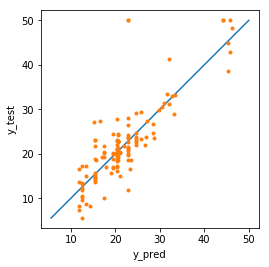

In [12]:
# 予測データ(y_pred)と真値(y_test)を描画
scatter(y_pred, y_test)

# 非線形回帰の確認

In [13]:
from sklearn.datasets import load_boston
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
# サンプルデータ
X, y = load_boston(True)
X = X[:, [5, 12]]

In [14]:
from sklearn.model_selection import GridSearchCV

gscv1 = GridSearchCV(SVR(), {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]},
    scoring='r2')
gscv1.fit(X, y)
y_pred = gscv1.predict(X)
score1 = r2_score(y, y_pred)
float(score1)

0.780

In [15]:
gscv1.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
gscv2 = GridSearchCV(RandomForestRegressor(),{
    'max_depth':[2,3,4],
    'min_samples_leaf':[1,2],
    'random_state':[0]})
gscv2.fit(X, y)
y_pred = gscv2.predict(X)
score2 = r2_score(y, y_pred)
float(score2)

0.827

In [17]:
gscv2.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)